### Make ROC curves from the stored pickle files (from k-folding training in python/)

In [2]:
import numpy as np
import math
import pickle
from scipy import interp
import matplotlib.pyplot as plt

In [3]:
models = ["IN_100", "DNN", "GRU", "CNN" ]
#models = ["DNN", "CNN","GRU"]

In [4]:
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']
titles = ['gluon', 'light quarks', 'W boson', 'Z boson', 'top quark']
kfold = 9

In [5]:
AUC_mean = {}
AUC_err = {}
for model in models:
    print("\n") 
    with open("../ROC/%s_ROC_AUC.pickle" %model, 'rb') as handle:
        AUC = pickle.load(handle)
    for label in labels:
        myAUC = []
        for k in range(kfold):
            myAUC.append(AUC['%s_%i' %(label,k)])
        myAUC = np.array(myAUC)
        Mean_AUC = np.mean(myAUC)
        RMS_AUC = np.std(myAUC)
        print("%s %s AUC: %.4f +/- %.4f" %(model, label, Mean_AUC, RMS_AUC))
        AUC_mean['%s_%s' %(model,label)] = Mean_AUC
        AUC_err['%s_%s' %(model,label)] = RMS_AUC        



DNN j_g AUC: 0.9384 +/- 0.0004
DNN j_q AUC: 0.9026 +/- 0.0004
DNN j_w AUC: 0.9537 +/- 0.0003
DNN j_z AUC: 0.9459 +/- 0.0005
DNN j_t AUC: 0.9620 +/- 0.0003


CNN j_g AUC: 0.8945 +/- 0.0027
CNN j_q AUC: 0.9007 +/- 0.0011
CNN j_w AUC: 0.9102 +/- 0.0011
CNN j_z AUC: 0.8994 +/- 0.0014
CNN j_t AUC: 0.9494 +/- 0.0004


GRU j_g AUC: 0.9040 +/- 0.0043
GRU j_q AUC: 0.8962 +/- 0.0052
GRU j_w AUC: 0.9192 +/- 0.0100
GRU j_z AUC: 0.9042 +/- 0.0104
GRU j_t AUC: 0.9350 +/- 0.0032


IN_100 j_g AUC: 0.9523 +/- 0.0000
IN_100 j_q AUC: 0.9300 +/- 0.0000
IN_100 j_w AUC: 0.9747 +/- 0.0000
IN_100 j_z AUC: 0.9697 +/- 0.0000
IN_100 j_t AUC: 0.9679 +/- 0.0000


In [6]:
if False:
    # IN training result
    with open("../IN/IN_ROC_100_AUC.pickle", 'rb') as handle:
            AUC_IN = pickle.load(handle)
    with open("../IN/IN_ROC_100_fpr.pickle", 'rb') as handle:
            fpr_IN = pickle.load(handle)
    with open("../IN/IN_ROC_100_tpr.pickle", 'rb') as handle:
            tpr_IN = pickle.load(handle)
    for label in labels:
        print(fpr_IN[label].shape, tpr_IN[label].shape)

j_g FPR = 0.100000
IN_100 $0.877 \pm 0.000$
DNN $0.830 \pm 0.002$
GRU $0.740 \pm 0.014$
CNN $0.700 \pm 0.008$
j_g FPR = 0.010000
IN_100 $0.477 \pm 0.000$
DNN $0.420 \pm 0.002$
GRU $0.273 \pm 0.018$
CNN $0.257 \pm 0.005$
j_q FPR = 0.100000
IN_100 $0.823 \pm 0.000$
DNN $0.715 \pm 0.002$
GRU $0.746 \pm 0.011$
CNN $0.740 \pm 0.003$
j_q FPR = 0.010000
IN_100 $0.301 \pm 0.000$
DNN $0.178 \pm 0.002$
GRU $0.220 \pm 0.037$
CNN $0.254 \pm 0.007$
j_w FPR = 0.100000
IN_100 $0.939 \pm 0.000$
DNN $0.855 \pm 0.001$
GRU $0.812 \pm 0.035$
CNN $0.760 \pm 0.005$
j_w FPR = 0.010000
IN_100 $0.725 \pm 0.000$
DNN $0.656 \pm 0.002$
GRU $0.249 \pm 0.057$
CNN $0.232 \pm 0.006$
j_z FPR = 0.100000
IN_100 $0.915 \pm 0.000$
DNN $0.833 \pm 0.002$
GRU $0.753 \pm 0.036$
CNN $0.721 \pm 0.006$
j_z FPR = 0.010000
IN_100 $0.782 \pm 0.000$
DNN $0.715 \pm 0.001$
GRU $0.386 \pm 0.060$
CNN $0.291 \pm 0.005$
j_t FPR = 0.100000
IN_100 $0.930 \pm 0.000$
DNN $0.917 \pm 0.001$
GRU $0.867 \pm 0.006$
CNN $0.889 \pm 0.001$
j_t FPR = 

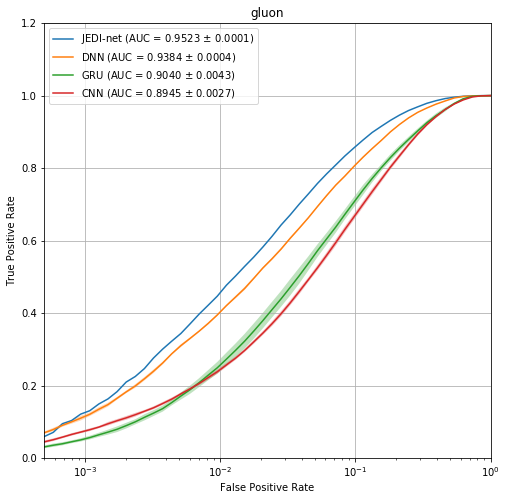

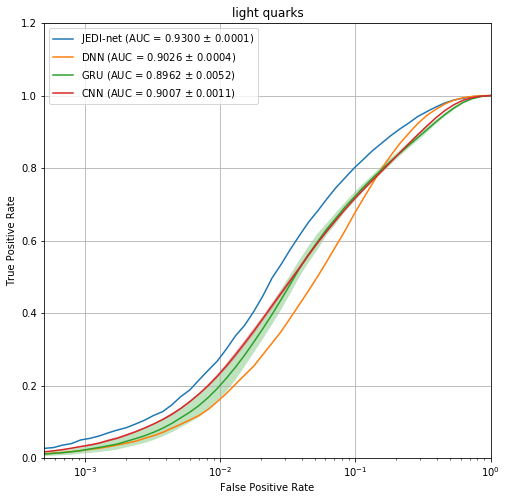

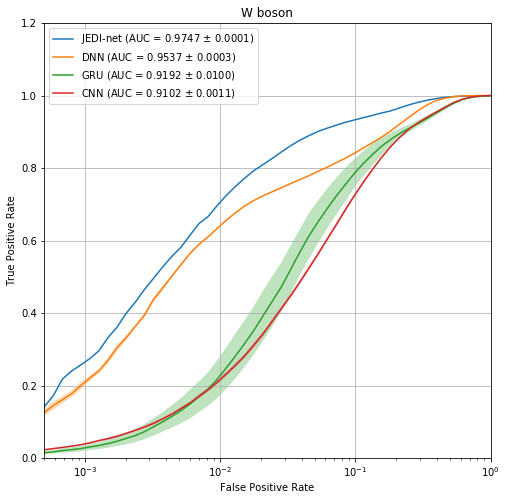

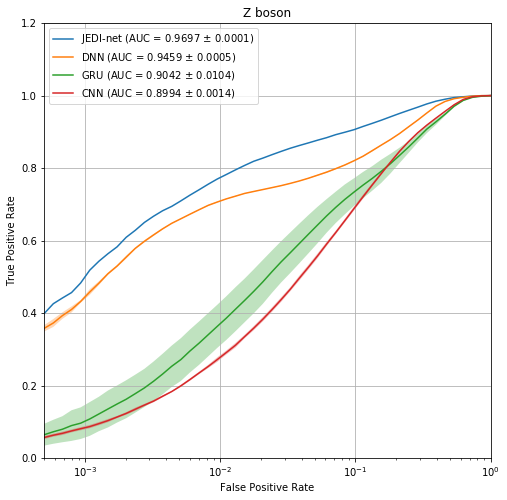

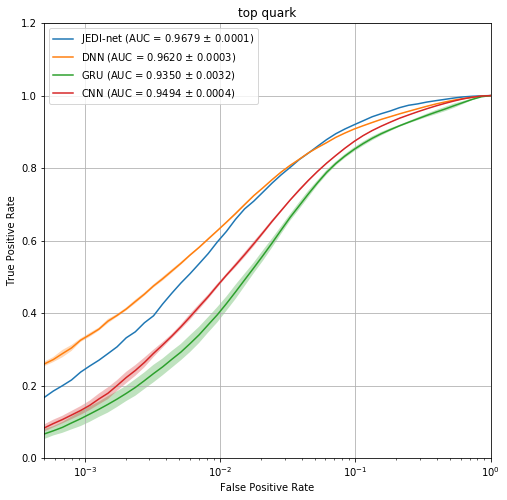

In [54]:
# sample points of fpr for average ROC curves
npoints = 50
base_fpr = np.exp(np.linspace(math.log(0.0005), 0., npoints))
#####
for i in range(len(labels)):
    label = labels[i]
    title = titles[i]
    avg_tpr = {}
    plus_tpr = {}
    minus_tpr = {}
    for model in models:   
        with open("../ROC/%s_ROC_fpr.pickle" %model, 'rb') as handle:
            fpr = pickle.load(handle)
        with open("../ROC/%s_ROC_tpr.pickle" %model, 'rb') as handle:
            tpr = pickle.load(handle)
        tpr_array = np.array([])
        for k in range(kfold):
            this_fpr = np.array(fpr["%s_%i" %(label,k)])
            this_tpr = np.array(tpr["%s_%i" %(label,k)])
            tpr_interpolated = interp(base_fpr, this_fpr, this_tpr)
            tpr_interpolated = tpr_interpolated.reshape((1,npoints))
            tpr_array = np.concatenate([tpr_array, tpr_interpolated], axis=0) if tpr_array.size else tpr_interpolated
        mean_tpr = np.mean(tpr_array, axis=0)
        rms_tpr = np.std(tpr_array, axis=0)
        ####
        plus_tpr[model] = np.minimum(mean_tpr+rms_tpr, np.ones(npoints))
        minus_tpr[model] = np.maximum(mean_tpr-rms_tpr,np.zeros(npoints))
        avg_tpr[model] = mean_tpr
    #### make the plot
    plt.figure(figsize=(8, 8))
    First = True
    for model in models:   
        mAUC = AUC_mean['%s_%s' %(model,label)]
        eAUC = AUC_err['%s_%s' %(model,label)]
        if model == "IN_100":
            plt.plot(base_fpr,avg_tpr[model],label='%s (AUC = %.4f $\pm$ 0.0001)' %("JEDI-net",mAUC), linewidth=1.5)
        else: 
            plt.plot(base_fpr,avg_tpr[model],label='%s (AUC = %.4f $\pm$ %.4f)' %(model,mAUC,eAUC), linewidth=1.5)
        plt.fill_between(base_fpr, minus_tpr[model], plus_tpr[model], alpha=0.3)
        if First:
            #plt.semilogy()
            plt.semilogx()
            plt.title(title)
            plt.ylabel("True Positive Rate")
            plt.xlabel("False Positive Rate")
            plt.xlim(0.0005,1.)
            plt.ylim(0.0,1.2)
            plt.grid(True)
            First = False
        plt.legend(loc='upper left')
        #plt.savefig('%s/ROC.pdf'%(options.outputDir))
    # now the IC curve
    #tpr_IN_interpolated = interp(base_fpr, fpr_IN[label], tpr_IN[label])
    #plt.plot(base_fpr,tpr_IN_interpolated,label='JEDI (AUC = %.3f)' %(AUC_IN[label]), linewidth=1.5)
    #plt.legend(loc='lower right')
    plt.draw()
    plt.savefig('ROC_%s.png' %title.replace(" ","_"), dpi=500)
    #plt.show()
    fprs = [0.1, 0.01]
    for my_fpr in fprs:
        #for model in models:   
        maxValues = np.array(base_fpr)
        minValues = maxValues[:-1]
        minValues = np.append(np.array([0.]), minValues)
        myValMask = (minValues <= my_fpr) * (my_fpr <= maxValues)
        print("%s FPR = %f" %(label, my_fpr))
        for model in models:
            plusVal = np.array(plus_tpr[model])[myValMask][0]
            minusVal = np.array(minus_tpr[model])[myValMask][0]
            print("%s $%.3f \\pm %.3f$"  %(model,(plusVal+minusVal)/2., (plusVal-minusVal)/2.))

In [ ]:
i_0p1 = 